In [3]:
import numpy as np 
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
actual = np.array(
    ['good','good','good','bad','good','bad','good','good','bad','bad'])
predicted = np.array(
    ['good','bad','good','bad','good','good','good','good','bad','bad'])

In [5]:
cm = confusion_matrix(actual,predicted)

In [6]:
cm

array([[3, 1],
       [1, 5]], dtype=int64)

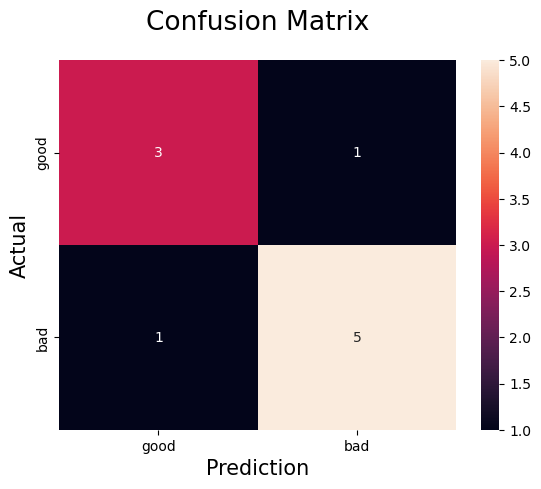

In [7]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['good','bad'],
            yticklabels=['good','bad'])
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix', fontsize=19, pad=22)

plt.xlabel('Prediction', fontsize=15)

plt.show()           

In [13]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         bad       0.75      0.75      0.75         4
        good       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("airlines_delay.csv")
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1


In [5]:
label_encoder_flight = LabelEncoder()
label_encoder_time = LabelEncoder()
label_encoder_length = LabelEncoder()
label_encoder_airline = LabelEncoder()
label_encoder_airportfrom = LabelEncoder()
label_encoder_airportto = LabelEncoder()
label_encoder_dayofweek = LabelEncoder()

In [9]:
df['Flight'] = label_encoder_flight.fit_transform(df['Flight'])
df['Time'] = label_encoder_time.fit_transform(df['Time'])
df['Airline'] = label_encoder_airline.fit_transform(df['Airline'])
df['AirportFrom'] = label_encoder_airportfrom.fit_transform(df['AirportFrom'])
df['AirportTo'] = label_encoder_airportto.fit_transform(df['AirportTo'])

In [11]:
X = df.drop(['Class','Length'],axis=1).values
y = df['Class'].values

In [13]:
X

array([[2308, 1006,    5,   16,  129,    1],
       [6198,   70,   12,   65,  208,    4],
       [1243,  880,    3,   35,   60,    3],
       ...,
       [5004,  537,    6,   47,   16,    2],
       [ 605,  425,   15,   45,   43,    4],
       [5664,  480,   12,   67,   79,    2]], dtype=int64)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.3, random_state=38)
X_train

array([[3099,  385,   10,  154,  258,    2],
       [5763,  390,   11,  148,  197,    4],
       [  76,  840,    3,  173,  148,    1],
       ...,
       [1742,  180,   14,  216,  153,    7],
       [2036, 1030,    5,  261,  154,    7],
       [ 887,  285,    1,  244,   80,    7]], dtype=int64)

In [19]:
X_test

array([[3067,  720,   15,  243,  217,    6],
       [3679,  330,    0,  106,   85,    6],
       [ 792,  245,    8,   16,  268,    6],
       ...,
       [ 156,  895,    5,   85,  159,    5],
       [1812,  280,   14,   35,  216,    3],
       [ 431,  500,    4,  159,  135,    3]], dtype=int64)

In [21]:
y_train

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [23]:
y_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [25]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
cm = confusion_matrix,(y_test , y_pred)
cm

(<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 (array([1, 0, 0, ..., 1, 1, 0], dtype=int64),
  array([1, 0, 0, ..., 1, 0, 0], dtype=int64)))

In [31]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Actual', fontsize=15)
plt.title('Confusion Matrix', fontsize=19, pad=22)

plt.xlabel('Prediction', fontsize=15)

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.